# Importing Libraries

## Utility Libraries

In [1]:
import time
import itertools
from tabulate import tabulate

## Visualization Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Handling and Numerical Operations

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

## Machine Learning Libraries

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

## Evaluation Metrics

In [5]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    confusion_matrix,
    f1_score,
    recall_score,
    classification_report,
)

# Define class names for labels
class_names = ["Benign", "Malicious", "Outlier"]

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

# Dataset for traning and testing

## Load Train Dataset

In [6]:
ds_train = pd.read_csv("Datasets/2021.02.07.csv")

## Check Basic Info

In [7]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364524 entries, 0 to 1364523
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1364524 non-null  float64
 1   bytes_in       1364524 non-null  int64  
 2   bytes_out      1364524 non-null  int64  
 3   dest_ip        1364524 non-null  int64  
 4   dest_port      1354542 non-null  float64
 5   entropy        1364524 non-null  float64
 6   num_pkts_out   1364524 non-null  int64  
 7   num_pkts_in    1364524 non-null  int64  
 8   proto          1364524 non-null  int64  
 9   src_ip         1364524 non-null  int64  
 10  src_port       1354542 non-null  float64
 11  time_end       1364524 non-null  int64  
 12  time_start     1364524 non-null  int64  
 13  total_entropy  1364524 non-null  float64
 14  label          1364524 non-null  object 
 15  duration       1364524 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 166.6

In [8]:
ds_train.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')

In [9]:
print(ds_train.describe())

            avg_ipt      bytes_in     bytes_out    dest_ip     dest_port  \
count  1.364524e+06  1.364524e+06  1.364524e+06  1364524.0  1.354542e+06   
mean   1.673218e+06  4.137569e+02  2.738852e+03      786.0  1.597113e+04   
std    4.852343e+07  2.076028e+03  5.482318e+03        0.0  1.849242e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00      786.0  1.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00      786.0  4.450000e+02   
50%    0.000000e+00  0.000000e+00  1.910000e+02      786.0  9.200000e+03   
75%    0.000000e+00  0.000000e+00  3.170250e+03      786.0  9.200000e+03   
max    4.294967e+09  5.717600e+04  6.553400e+04      786.0  6.553400e+04   

            entropy  num_pkts_out   num_pkts_in         proto     src_ip  \
count  1.364524e+06  1.364524e+06  1.364524e+06  1.364524e+06  1364524.0   
mean   3.123706e+00  4.742718e+00  2.464735e+00  6.012834e+00      786.0   
std    2.392273e+00  1.458849e+01  1.016017e+01  8.526812e-01        0.0   
min    0.00

In [10]:
print(ds_train.describe(include='object'))

          label
count   1364524
unique        3
top      benign
freq     880911


In [11]:
print(ds_train['label'].value_counts())

label
benign       880911
malicious    255182
outlier      228431
Name: count, dtype: int64


## Visualize class distribution

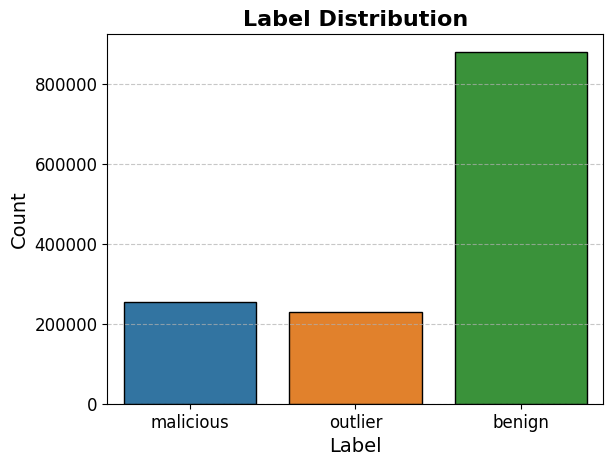

In [12]:
sns.countplot(
    x=ds_train['label'], 
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
    edgecolor='black'
)
plt.title('Label Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Protocol analysis

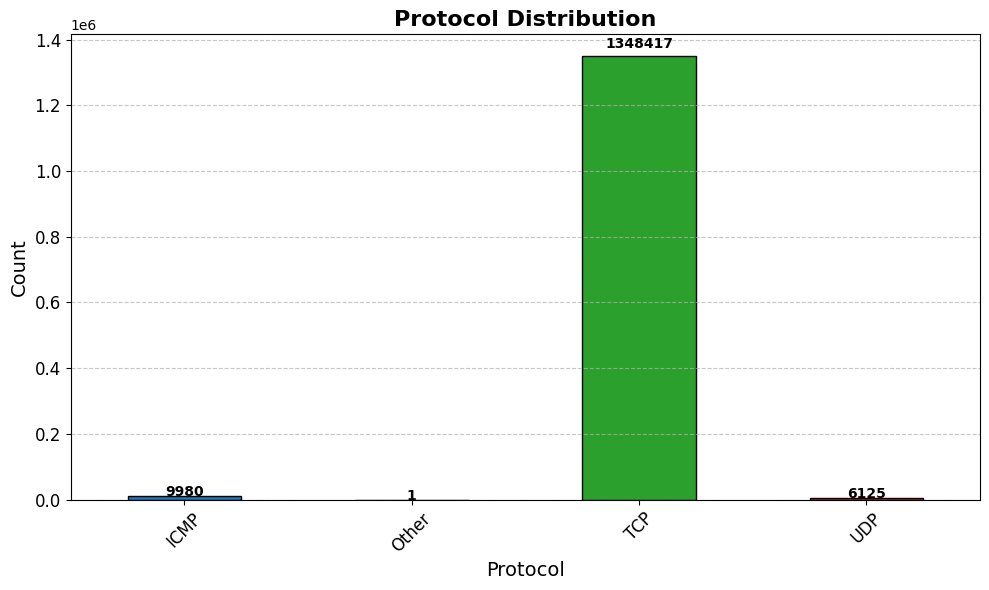

In [13]:
protocol_mapping = {6: "TCP", 17: "UDP", 1: "ICMP", 58: "Other", 2: "Other"} 
protocol_counts = ds_train['proto'].value_counts()
protocol_counts.index = protocol_counts.index.map(protocol_mapping)

protocol_counts = protocol_counts.groupby(protocol_counts.index).sum()

protocol_counts.plot(
    kind='bar',
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # Custom colors
    figsize=(10, 6),
    edgecolor='black'
)

plt.title('Protocol Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Protocol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(protocol_counts):
    plt.text(i, v + (v * 0.02), str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


## Correlation heatmap

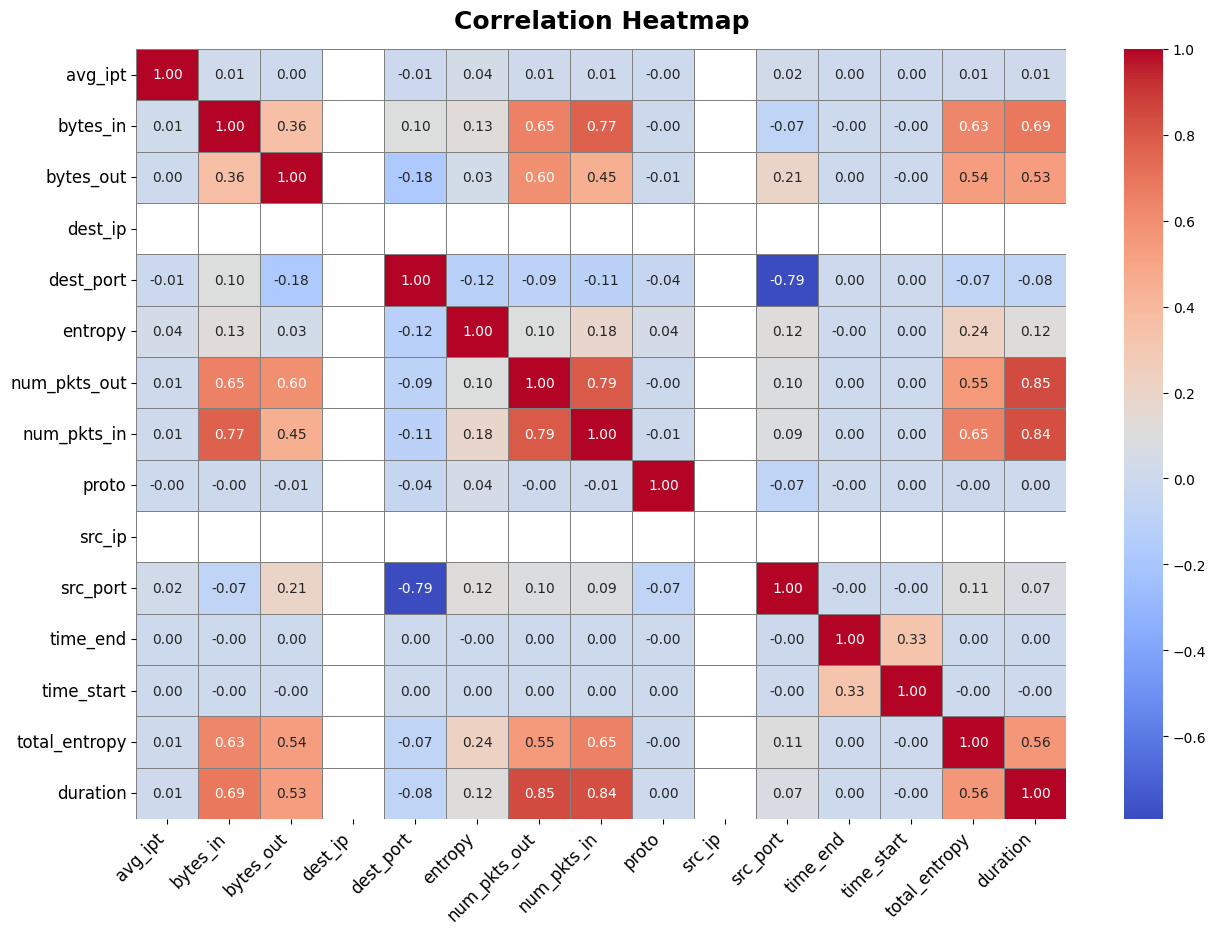

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    ds_train.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 10},
    linewidths=0.5,
    linecolor="gray"
)

plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=15)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

## Protocol usage by label

protocol_name
TCP      1348417
ICMP        9980
UDP         6125
Other          2
Name: count, dtype: int64


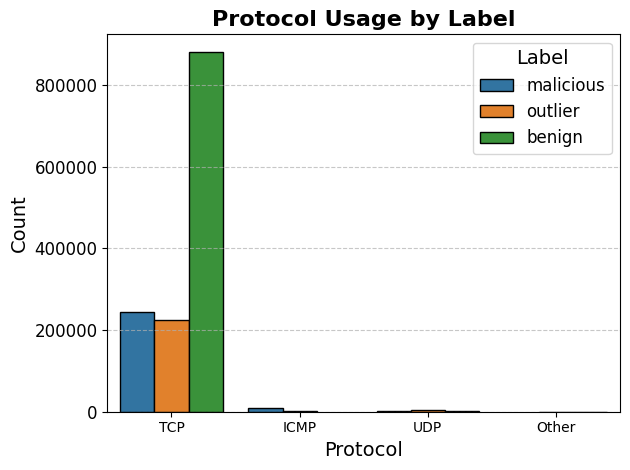

In [15]:
if 'protocol_name' not in ds_train.columns:
    protocol_mapping = {6: 'TCP', 17: 'UDP', 1: 'ICMP'}
    ds_train['protocol_name'] = ds_train['proto'].map(protocol_mapping).fillna('Other')

print(ds_train['protocol_name'].value_counts())

sns.countplot(
    x='protocol_name', 
    hue='label', 
    data=ds_train, 
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
    edgecolor='black'
)

plt.title('Protocol Usage by Label', fontsize=16, fontweight='bold')
plt.xlabel('Protocol', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Label', fontsize=12, title_fontsize=14, loc='upper right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Load test dataset

In [16]:
ds_test = pd.read_csv("Datasets/2020.10.05.csv")

## Check basic information

In [17]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821495 entries, 0 to 821494
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        821495 non-null  float64
 1   bytes_in       821495 non-null  int64  
 2   bytes_out      821495 non-null  int64  
 3   dest_ip        821495 non-null  int64  
 4   dest_port      808256 non-null  float64
 5   entropy        821495 non-null  float64
 6   num_pkts_out   821495 non-null  int64  
 7   num_pkts_in    821495 non-null  int64  
 8   proto          821495 non-null  int64  
 9   src_ip         821495 non-null  int64  
 10  src_port       808256 non-null  float64
 11  time_end       821495 non-null  int64  
 12  time_start     821495 non-null  int64  
 13  total_entropy  821495 non-null  float64
 14  label          821495 non-null  object 
 15  duration       821495 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 100.3+ MB


In [18]:
print(ds_test.describe())

            avg_ipt       bytes_in      bytes_out        dest_ip  \
count  8.214950e+05  821495.000000  821495.000000  821495.000000   
mean   2.881955e+06     505.302971    2423.336052    6147.214418   
std    6.328739e+07    2378.136747    6285.911200   30962.609366   
min    0.000000e+00       0.000000       0.000000       4.000000   
25%    0.000000e+00       0.000000       0.000000     786.000000   
50%    0.000000e+00       0.000000     191.000000     786.000000   
75%    7.225000e+01     270.000000    1448.000000     786.000000   
max    4.294967e+09   65178.000000   65532.000000  398722.000000   

           dest_port        entropy   num_pkts_out    num_pkts_in  \
count  808256.000000  821495.000000  821495.000000  821495.000000   
mean    13149.227190       3.269133       6.428561       4.250082   
std     20116.429525       2.269245      20.642238      14.356121   
min         1.000000       0.000000       0.000000       0.000000   
25%       445.000000       0.143992       

In [19]:
print(ds_test.describe(include='object'))

         label
count   821495
unique       3
top     benign
freq    390800


## Check label distribution

Label Distribution in Test Dataset:
 label
benign       390800
malicious    376657
outlier       54038
Name: count, dtype: int64


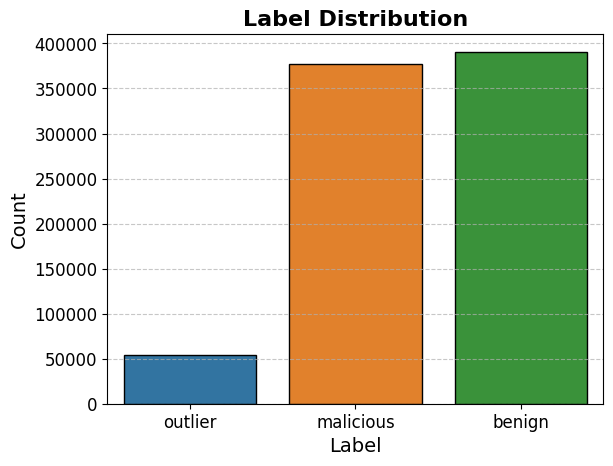

In [20]:
print("Label Distribution in Test Dataset:\n", ds_test['label'].value_counts())
sns.countplot(
    x=ds_test['label'], 
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
    edgecolor='black'
)
plt.title('Label Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Protocol mapping and consistency

In [21]:
protocol_mapping = {6: 'TCP', 17: 'UDP', 1: 'ICMP'}
ds_test['protocol_name'] = ds_test['proto'].map(protocol_mapping).fillna('Other')
print("Protocol Distribution in Test Dataset:\n", ds_test['protocol_name'].value_counts())

Protocol Distribution in Test Dataset:
 protocol_name
TCP      794239
UDP       14017
ICMP      13237
Other         2
Name: count, dtype: int64


## Compare columns between train and test datasets

In [22]:
print("Train columns:", ds_train.columns)
print("Test columns:", ds_test.columns)

Train columns: Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration',
       'protocol_name'],
      dtype='object')
Test columns: Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration',
       'protocol_name'],
      dtype='object')


# Data Processing

## Missing Values Check

In [23]:
missing_train = ds_train.isnull().sum()
missing_test = ds_test.isnull().sum()

print("Missing values in train dataset:\n", missing_train[missing_train > 0])
print("Missing values in test dataset:\n", missing_test[missing_test > 0])

Missing values in train dataset:
 dest_port    9982
src_port     9982
dtype: int64
Missing values in test dataset:
 dest_port    13239
src_port     13239
dtype: int64


## Percentage of missing values

In [24]:
missing_train_pct = missing_train / len(ds_train) * 100
missing_test_pct = missing_test / len(ds_test) * 100

print("Missing values in train dataset (%):\n", missing_train_pct[missing_train_pct > 0])
print("Missing values in test dataset (%):\n", missing_test_pct[missing_test_pct > 0])

Missing values in train dataset (%):
 dest_port    0.731537
src_port     0.731537
dtype: float64
Missing values in test dataset (%):
 dest_port    1.611574
src_port     1.611574
dtype: float64


## Duplicate Rows Check

In [25]:
print(f"Total Number of duplicate rows in train dataset: {ds_train.duplicated().sum()}")
print(f"Total Number of duplicate rows in test dataset: {ds_test.duplicated().sum()}")

Total Number of duplicate rows in train dataset: 467
Total Number of duplicate rows in test dataset: 445


## Drop Duplicates

In [26]:
ds_train.drop_duplicates(inplace=True)
ds_test.drop_duplicates(inplace=True)

print(f"Train Dataset Shape After Duplicate Removal: {ds_train.shape}")
print(f"Test Dataset Shape After Duplicate Removal: {ds_test.shape}")

Train Dataset Shape After Duplicate Removal: (1364057, 17)
Test Dataset Shape After Duplicate Removal: (821050, 17)


## Label Encoding

In [27]:
def labelencoder(df):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col].fillna('Missing'))
    return df

ds_train = labelencoder(ds_train)
ds_test = labelencoder(ds_test)


In [28]:
print(ds_train.head())

   avg_ipt  bytes_in  bytes_out  dest_ip  dest_port   entropy  num_pkts_out  \
0    78.25       270        191      786      445.0  4.542255             5   
1    46.25       270        191      786      445.0  4.542255             6   
2    44.00       270        191      786      445.0  4.542255             6   
3    54.50       270        191      786      445.0  4.542255             6   
4    44.75       270        191      786      445.0  4.542255             6   

   num_pkts_in  proto  src_ip  src_port          time_end        time_start  \
0            6      6     786   58840.0  1612693512343179  1612693511873399   
1            6      6     786   59448.0  1612693515834916  1612693515490097   
2            6      6     786   59452.0  1612693516341856  1612693516009797   
3            6      6     786   59501.0  1612693518489234  1612693518117766   
4            6      6     786   58209.0  1612693504663172  1612693504325423   

   total_entropy  label  duration  protocol_name  

In [29]:
print(ds_test.head())

      avg_ipt  bytes_in  bytes_out  dest_ip  dest_port   entropy  \
0  103.750000       270        191      786      445.0  4.576830   
1  132.000000       270        191      786      445.0  4.557482   
2  114.142857        34         29      786     5900.0  5.020696   
3  104.750000       270        191      786      445.0  4.576830   
4  132.250000       270        191      786      445.0  4.557482   

   num_pkts_out  num_pkts_in  proto  src_ip  src_port          time_end  \
0            10            8      6  133481   55891.0  1601856854463448   
1             6            6      6    3462   61980.0  1601856854833989   
2            11            9      6   49877   11986.0  1601856854929062   
3            10            8      6  133481   56148.0   160185685507341   
4             6            6      6    3462   62050.0  1601856855615438   

         time_start  total_entropy  label  duration  protocol_name  
0  1601856853656459     2109.91870      2  0.806989              2  
1 

## Dropping unwanted columns

In [30]:
columns_to_drop = ['src_ip', 'dest_ip', 'time_start', 'time_end', 'total_entropy']

ds_train = ds_train.drop(columns=[col for col in columns_to_drop if col in ds_train.columns], axis=1)
ds_test = ds_test.drop(columns=[col for col in columns_to_drop if col in ds_test.columns], axis=1)

In [31]:
print("Remaining columns in train dataset:", ds_train.columns)

Remaining columns in train dataset: Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_port', 'label', 'duration',
       'protocol_name'],
      dtype='object')


In [32]:
print("Remaining columns in test dataset:", ds_test.columns)

Remaining columns in test dataset: Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_port', 'label', 'duration',
       'protocol_name'],
      dtype='object')


## Feature Selection using Recursive Feature Elimination(RFE) with a Random Forest Classifier

In [33]:
X = ds_train.drop(columns=['label'], axis=1)
y = ds_train['label']

rfc = RandomForestClassifier(random_state=42)

n_features_to_select = 10
rfe = RFE(estimator=rfc, n_features_to_select=n_features_to_select, step=1)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]


### Top Selected Features

In [34]:
top_features = pd.DataFrame({
    'Rank': rfe.ranking_,
    'Feature': X.columns
}).sort_values(by='Rank').reset_index(drop=True)

top_selected_features = top_features[top_features['Rank'] == 1]

print("Top Selected Features:\n", top_selected_features)

Top Selected Features:
    Rank        Feature
0     1        avg_ipt
1     1       bytes_in
2     1      bytes_out
3     1      dest_port
4     1        entropy
5     1   num_pkts_out
6     1    num_pkts_in
7     1       src_port
8     1  protocol_name
9     1       duration


### Top Features by Importance

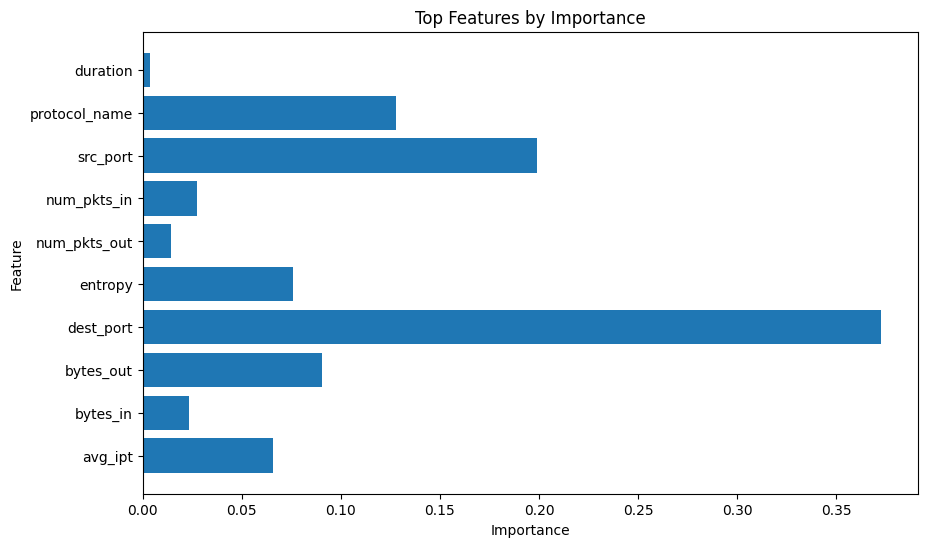

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(top_selected_features['Feature'], rfe.estimator_.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features by Importance')
plt.show()

## Splitting Dataset (Train-Test Split)

In [36]:
X = ds_train[selected_features]
y = ds_train['label']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=0.8, random_state=42
)

## Scaling Features

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [38]:
if 'ds_test' in globals():
    ds_test_scaled = scaler.transform(ds_test[selected_features])

print("Training set shape (X_train_scaled):", X_train_scaled.shape)
print("Validation set shape (X_val_scaled):", X_val_scaled.shape)
if 'ds_test' in globals():
    print("Test set shape (ds_test_scaled):", ds_test_scaled.shape)

Training set shape (X_train_scaled): (1091245, 10)
Validation set shape (X_val_scaled): (272812, 10)
Test set shape (ds_test_scaled): (821050, 10)


# Model Selection

## Impute Missing Values

In [39]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_val)

## Train Logistic Regression and Measure Timing

In [40]:
start_time = time.time()
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
fit_time = time.time() - start_time

## Make Predictions and Measure Timing

In [41]:
start_time = time.time()
y_pred = clf.predict(X_test)
predict_time = time.time() - start_time

## Evaluate the Model

In [42]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
report = classification_report(y_val, y_pred, target_names=class_names)

## Print Results

In [43]:
print(f"Time taken to fit the model: {fit_time:.3f} seconds")
print(f"Time taken to predict: {predict_time:.3f} seconds")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Classification Report:\n{report}")

Time taken to fit the model: 246.426 seconds
Time taken to predict: 0.028 seconds
Accuracy: 0.707
Precision: 0.624
Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.90      0.88    176184
   Malicious       0.39      0.67      0.50     50832
     Outlier       0.00      0.00      0.00     45796

    accuracy                           0.71    272812
   macro avg       0.42      0.52      0.46    272812
weighted avg       0.62      0.71      0.66    272812



### Perform Cross-Validation

In [44]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")

Cross-Validation Scores: [0.70687151 0.70726097 0.70879592 0.70687609 0.70799866]
Mean CV Accuracy: 0.708


### Plot Cross-Validation Scores

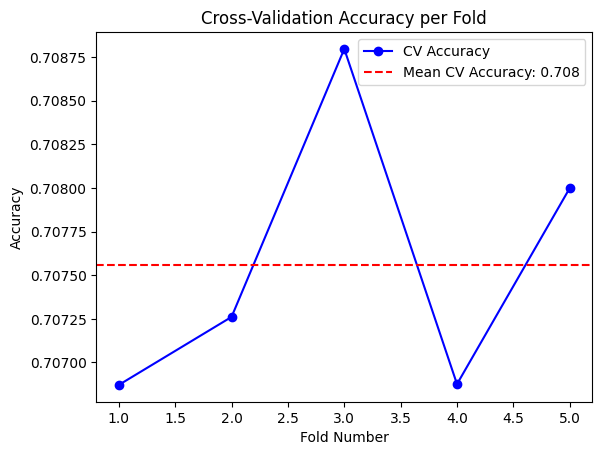

In [45]:
plt.plot(np.arange(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean CV Accuracy: {cv_scores.mean():.3f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.legend()
plt.show()

### Function to evaluate a model and generate metrics

In [46]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test, class_names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, target_names=class_names)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision (weighted): {precision:.3f}")
    print(f"Classification Report:\n{report}")
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

### K-Nearest Neighbors (KNN) Classifier


K-Nearest Neighbors
Accuracy: 0.910
Precision (weighted): 0.910
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    176184
   Malicious       0.77      0.74      0.75     50832
     Outlier       0.72      0.76      0.74     45796

    accuracy                           0.91    272812
   macro avg       0.83      0.83      0.83    272812
weighted avg       0.91      0.91      0.91    272812



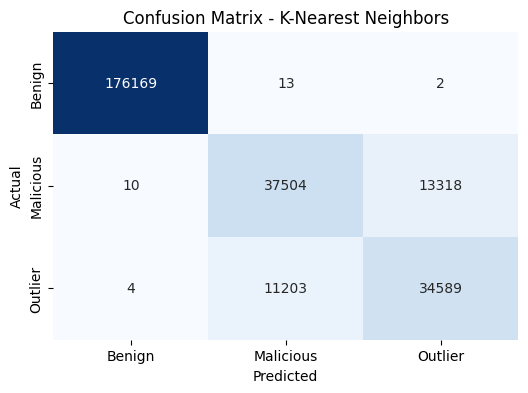

In [47]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
evaluate_model("K-Nearest Neighbors", knn_model, X_train, y_train, X_test, y_val, class_names)

### Decision Tree Classifier


Decision Tree Classifier
Accuracy: 0.939
Precision (weighted): 0.943
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    176184
   Malicious       0.90      0.75      0.82     50832
     Outlier       0.77      0.91      0.83     45796

    accuracy                           0.94    272812
   macro avg       0.89      0.89      0.88    272812
weighted avg       0.94      0.94      0.94    272812



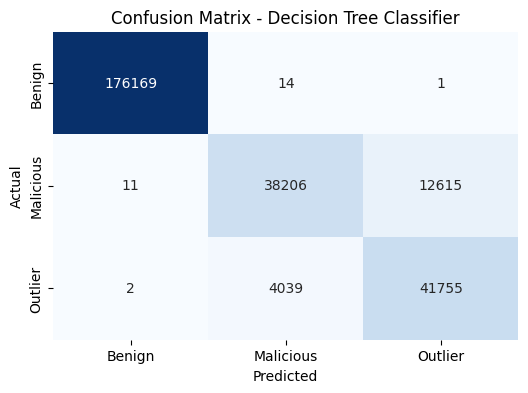

In [48]:
dtc_model = DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=42)
evaluate_model("Decision Tree Classifier", dtc_model, X_train, y_train, X_test, y_val, class_names)

### Random Forest Classifier


Random Forest Classifier
Accuracy: 0.946
Precision (weighted): 0.946
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    176184
   Malicious       0.86      0.85      0.85     50832
     Outlier       0.83      0.85      0.84     45796

    accuracy                           0.95    272812
   macro avg       0.90      0.90      0.90    272812
weighted avg       0.95      0.95      0.95    272812



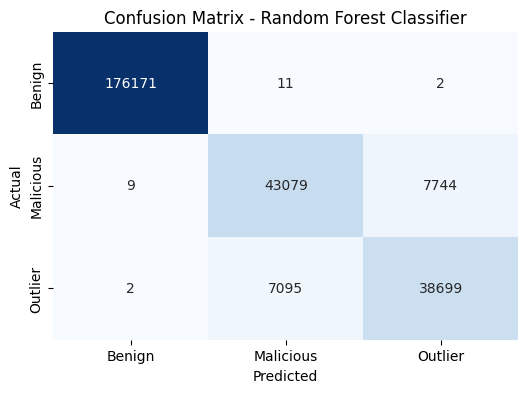

In [49]:
rfc_model = RandomForestClassifier(n_estimators=50, random_state=42)
evaluate_model("Random Forest Classifier", rfc_model, X_train, y_train, X_test, y_val, class_names)

### Logistic Regression


Logistic Regression
Accuracy: 0.707
Precision (weighted): 0.624
Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.90      0.88    176184
   Malicious       0.39      0.67      0.50     50832
     Outlier       0.00      0.00      0.00     45796

    accuracy                           0.71    272812
   macro avg       0.42      0.52      0.46    272812
weighted avg       0.62      0.71      0.66    272812



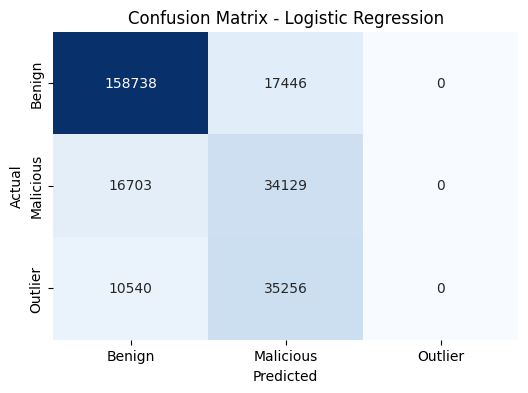

In [50]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
evaluate_model("Logistic Regression", lr_model, X_train, y_train, X_test, y_val, class_names)

# Model Evaluation

In [51]:
def metrics(clf, X_train, y_train, X_test, y_test, class_names=None, display=True):
    """
    Calculate and display performance metrics for a classifier.
    
    Parameters:
    - clf: Classifier object
    - X_train, y_train: Training features and labels
    - X_test, y_test: Testing features and labels
    - class_names: List of class names for the classification report and confusion matrix
    - display: Whether to print metrics and plot the confusion matrix
    
    Returns:
    - accuracy, precision, f1, recall
    """
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    if display:
        if class_names:
            print(classification_report(y_test, y_pred, target_names=class_names))
        else:
            print(classification_report(y_test, y_pred))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap="Blues", 
                    xticklabels=class_names, yticklabels=class_names if class_names else None)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix')
        plt.show()
    
    return accuracy, precision, f1, recall

Evaluating: KNN
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    176184
   Malicious       0.77      0.74      0.75     50832
     Outlier       0.72      0.76      0.74     45796

    accuracy                           0.91    272812
   macro avg       0.83      0.83      0.83    272812
weighted avg       0.91      0.91      0.91    272812



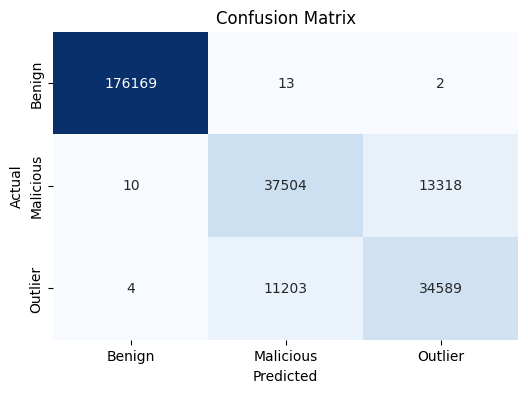

Evaluating: Decision Tree
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    176184
   Malicious       0.90      0.75      0.82     50832
     Outlier       0.77      0.91      0.83     45796

    accuracy                           0.94    272812
   macro avg       0.89      0.89      0.88    272812
weighted avg       0.94      0.94      0.94    272812



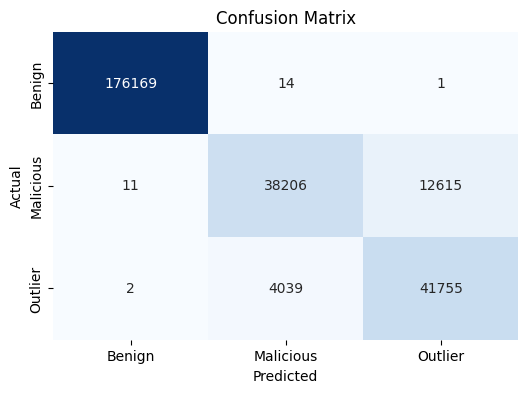

Evaluating: Random Forest
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    176184
   Malicious       0.86      0.85      0.85     50832
     Outlier       0.83      0.85      0.84     45796

    accuracy                           0.95    272812
   macro avg       0.90      0.90      0.90    272812
weighted avg       0.95      0.95      0.95    272812



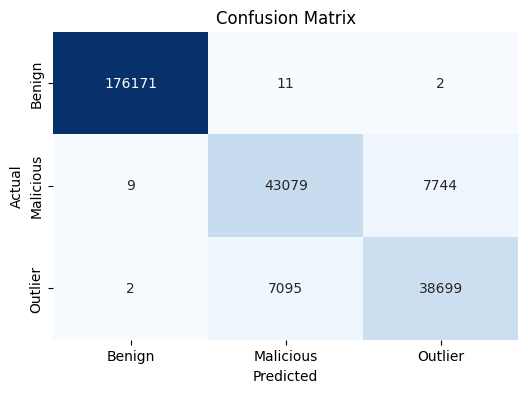

Evaluating: Logistic Regression
              precision    recall  f1-score   support

      Benign       0.85      0.90      0.88    176184
   Malicious       0.39      0.67      0.50     50832
     Outlier       0.00      0.00      0.00     45796

    accuracy                           0.71    272812
   macro avg       0.42      0.52      0.46    272812
weighted avg       0.62      0.71      0.66    272812



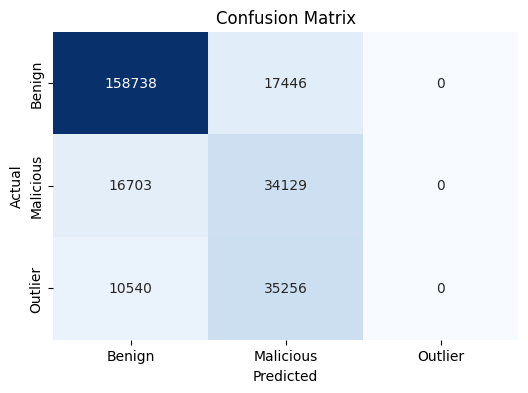

             Algorithm Accuracy Precision F1-score  Recall
1        Random Forest   0.9455    0.9456   0.9455  0.9455
2        Decision Tree   0.9389    0.9431   0.9386  0.9389
3                  KNN   0.9100    0.9104   0.9101  0.9100
4  Logistic Regression   0.7070    0.6244   0.6585  0.7070


In [52]:
# Clear lists to ensure no duplicates
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
model_names = []

# Define classifiers
clfs = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Loop through classifiers and calculate metrics
for name, clf in clfs.items():
    print(f"Evaluating: {name}")  # Debugging output
    current_accuracy, current_precision, current_f1, current_recall = metrics(
        clf, X_train, y_train, X_test, y_val, class_names=class_names  # Ensure y_test is correct
    )
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    model_names.append(name)

# Create the performance DataFrame
performance_df = pd.DataFrame({
    'Algorithm': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'F1-score': f1_scores,
    'Recall': recall_scores
})

# Sort and format the DataFrame
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
performance_df.index = performance_df.index + 1  # Start index from 1
performance_df['Accuracy'] = performance_df['Accuracy'].map("{:.4f}".format)
performance_df['Precision'] = performance_df['Precision'].map("{:.4f}".format)
performance_df['F1-score'] = performance_df['F1-score'].map("{:.4f}".format)
performance_df['Recall'] = performance_df['Recall'].map("{:.4f}".format)

# Display the final DataFrame
print(performance_df)

## Model Evaluation with Cross-Validation, Confusion Matrices, and F1-Scores

### Define Models

In [53]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, criterion='entropy', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42)
}

target_names = ["malicious", "benign", "outlier"]

### Cross-validation for precision and recall

In [ ]:
scores = {}
for name, model in models.items():
    scores[name] = {
        'precision': cross_val_score(model, X_train, y_train, cv=10, scoring='precision_weighted').mean(),
        'recall': cross_val_score(model, X_train, y_train, cv=10, scoring='recall_weighted').mean()
    }

# Display mean and standard deviation of precision and recall
print("\nCross-Validation Results:\n")
for name, metrics in scores.items():
    print(f"{name}:\n"
          f"  Precision: {metrics['precision']:.4f}\n"
          f"  Recall: {metrics['recall']:.4f}\n")

### Generate confusion matrices and classification reports


Model Evaluation on Test Data:

----K-Nearest Neighbors Classification Report-----
              precision    recall  f1-score   support

   malicious       1.00      1.00      1.00     53426
      benign       0.87      0.92      0.90     57280
     outlier       0.66      0.51      0.58     16389

    accuracy                           0.90    127095
   macro avg       0.84      0.81      0.82    127095
weighted avg       0.90      0.90      0.90    127095



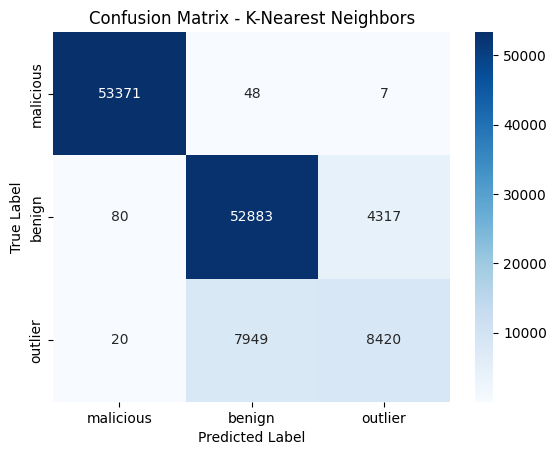

----Logistic Regression Classification Report-----
              precision    recall  f1-score   support

   malicious       0.78      0.85      0.81     53426
      benign       0.67      0.81      0.73     57280
     outlier       0.00      0.00      0.00     16389

    accuracy                           0.72    127095
   macro avg       0.48      0.55      0.51    127095
weighted avg       0.63      0.72      0.67    127095



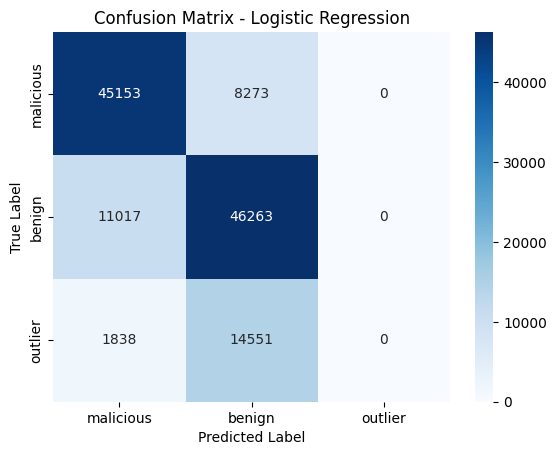

-------Decision Tree Classification Report--------
              precision    recall  f1-score   support

   malicious       1.00      1.00      1.00     53426
      benign       0.94      0.98      0.96     57280
     outlier       0.93      0.79      0.85     16389

    accuracy                           0.96    127095
   macro avg       0.96      0.92      0.94    127095
weighted avg       0.96      0.96      0.96    127095



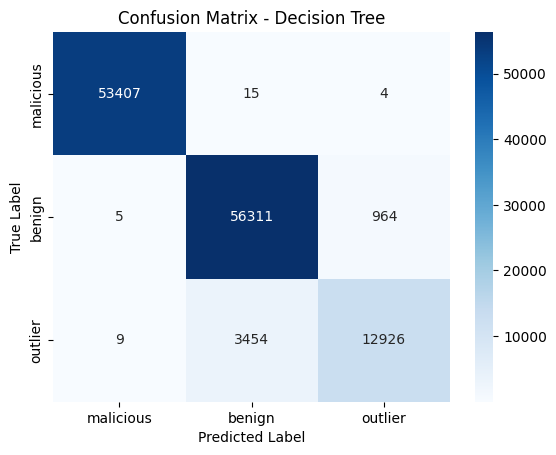

-------Random Forest Classification Report--------
              precision    recall  f1-score   support

   malicious       1.00      1.00      1.00     53426
      benign       0.97      0.99      0.98     57280
     outlier       0.95      0.88      0.91     16389

    accuracy                           0.98    127095
   macro avg       0.97      0.95      0.96    127095
weighted avg       0.98      0.98      0.98    127095



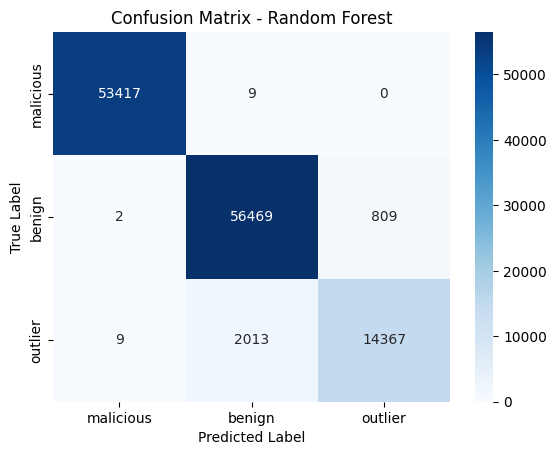

In [117]:
# Fit models and evaluate on test data
preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds[name] = model.predict(X_test)

print("\nModel Evaluation on Test Data:\n")
for name, y_pred in preds.items():
    print(f"{name} Classification Report".center(50, '-'))
    print(classification_report(y_val, y_pred, target_names=target_names))
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


### Calculate and plot F1-scores

F1-scores for each model (as percentages): {'K-Nearest Neighbors': 89.77049693161912, 'Logistic Regression': 67.0654466160736, 'Decision Tree': 96.39156190859488, 'Random Forest': 97.73273651254382}


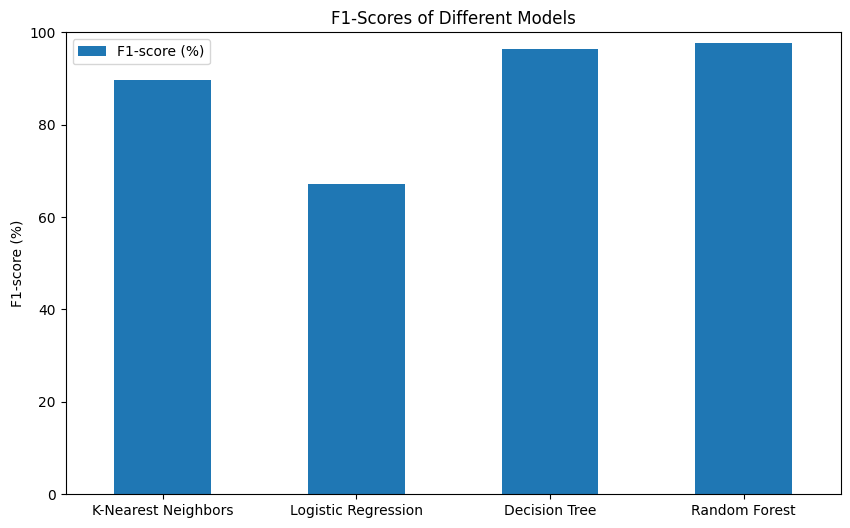

In [121]:
f1_scores = {
    name: f1_score(y_val, preds[name], average="weighted") * 100 for name in models
}

f1_scores_df = pd.DataFrame(
    f1_scores.values(),
    index=f1_scores.keys(),
    columns=["F1-score (%)"]
)

f1_scores_df.plot(
    kind="bar",
    ylim=[0, 100],
    figsize=(10, 6),
    rot=0
)
plt.title("F1-Scores of Different Models")
plt.ylabel("F1-score (%)")
plt.show()
